In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

path = '../../data_20210213_1406_____USE_THIS_latest_version/train_20210213_1406_NAmean.csv'
df = pd.read_csv(path)

x_all = df.drop(columns='SalePrice', axis=1)
y = df['SalePrice']

x_top_5 = df[["OverallQual", "GrLivArea", "TotalBsmtSF", "2ndFlrSF", "GarageCars"]]

X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(x_all, y, test_size=0.20, random_state=123)

X_top_5_train, X_top_5_test, y_top_5_train, y_top_5_test = train_test_split(x_top_5, y, test_size=0.20, random_state=123)

print('X_all:', x_all.shape)
print('X_top_5:', x_top_5.shape)
print('y:', y.shape)

X_all: (1460, 195)
X_top_5: (1460, 5)
y: (1460,)


In [4]:
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(criterion='mse',
                                max_depth=6, 
                                min_samples_leaf=1,
                                min_samples_split=2)
regr_1.fit(X_all_train, y_all_train)
y_all_preds_train = regr_1.predict(X_all_train)
y_all_preds_test = regr_1.predict(X_all_test)

regr_2 = DecisionTreeRegressor(criterion='mse',
                                max_depth=6, 
                                min_samples_leaf=1,
                                min_samples_split=2)
regr_2.fit(X_top_5_train, y_top_5_train)
y_top_5_preds_train = regr_2.predict(X_top_5_train)
y_top_5_preds_test = regr_2.predict(X_top_5_test)

In [10]:
print('Train set predictions/all (true, pred):', y_all_train.shape, y_all_preds_train.shape)
print('Test set predictions/all (true, pred):', y_all_test.shape, y_all_preds_test.shape)

print('Train set predictions/top 5 (true, pred):', y_top_5_train.shape, y_top_5_preds_train.shape)
print('Train set predictions/top 5 (true, pred):', y_top_5_train.shape, y_top_5_preds_train.shape)

Train set predictions/all (true, pred): (1168,) (1168,)
Test set predictions/all (true, pred): (292,) (292,)
Train set predictions/top 5 (true, pred): (1168,) (1168,)
Train set predictions/top 5 (true, pred): (1168,) (1168,)


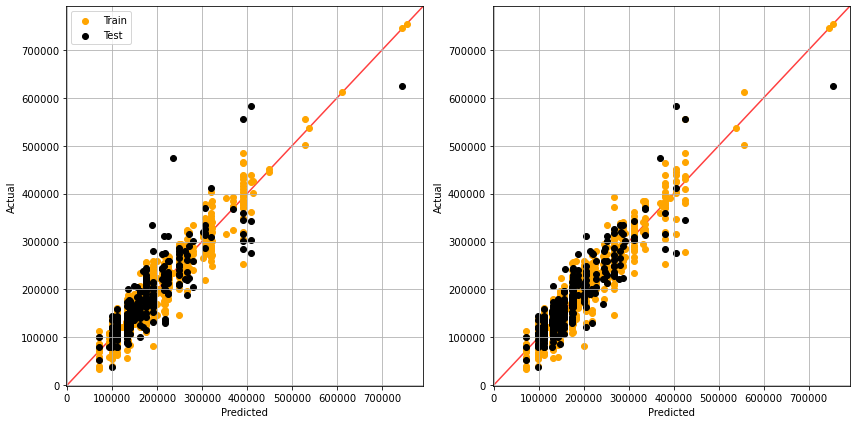

In [37]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].scatter(y_all_preds_train, y_all_train, label='Train', color='orange')
ax[0].scatter(y_all_preds_test, y_all_test, label='Test', color='black')
lims = [
    np.min([ax[0].get_xlim(), ax[0].get_ylim()]),  # min of both axes
    np.max([ax[0].get_xlim(), ax[0].get_ylim()]),  # max of both axes
]
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
# ax[0].set_title('')
# now plot both limits against eachother
ax[0].plot(lims, lims, 'r-', alpha=0.75, zorder=0)
ax[0].legend(loc='best', frameon=True)
ax[0].set_xlim(lims)
ax[0].set_ylim(lims)
ax[0].grid(True)


ax[1].scatter(y_top_5_preds_train, y_top_5_train, label='Train', color='orange')
ax[1].scatter(y_top_5_preds_test, y_top_5_test, label='Test', color='black')

lims = [
    np.min([ax[1].get_xlim(), ax[1].get_ylim()]),  # min of both axes
    np.max([ax[1].get_xlim(), ax[1].get_ylim()]),  # max of both axes
]
ax[1].plot(lims, lims, 'r-', alpha=0.75, zorder=0)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
# ax[1].set_title('')
# ax[1].legend(loc='best', frameon=True)
ax[1].set_xlim(lims)
ax[1].set_ylim(lims)
ax[1].grid(True)
plt.tight_layout()
plt.savefig('dt_all_top_5.png')

In [41]:
from sklearn.metrics import r2_score, mean_squared_error

r2_all_train = r2_score(y_all_train, y_all_preds_train)
rmse_all_train = mean_squared_error(y_all_train, y_all_preds_train, squared=False)
print(f"R^2 (train/all): {r2_all_train}")
print(f"RMSE (train/all): {rmse_all_train}")
r2_all_test = r2_score(y_all_test, y_all_preds_test)
rmse_all_test = mean_squared_error(y_all_test, y_all_preds_test, squared=False)
print(f"R^2 (test/all): {r2_all_test}")
print(f"RMSE (test/all): {rmse_all_test}")

r2_top_5_train = r2_score(y_top_5_train, y_top_5_preds_train)
rmse_top_5_test = mean_squared_error(y_top_5_test, y_top_5_preds_test, squared=False)
print(f"R^2 (train/top 5): {r2_top_5_train}")
print(f"RMSE (train/top 5): {rmse_top_5_test}")
r2_top_5_test = r2_score(y_top_5_test, y_top_5_preds_test)
rmse_top_5_test = mean_squared_error(y_top_5_test, y_top_5_preds_test, squared=False)
print(f"R^2 (test/top 5): {r2_top_5_test}")
print(f"RMSE (test/top 5): {rmse_top_5_test}")

R^2 (train/all): 0.9116274365567552
RMSE (train/all): 23667.241648795753
R^2 (test/all): 0.7553959729465446
RMSE (test/all): 38878.76941213467
R^2 (train/top 5): 0.892086335805907
RMSE (train/top 5): 34435.47391712332
R^2 (test/top 5): 0.8081107210156533
RMSE (test/top 5): 34435.47391712332
